# Noise Interferometry Test
This tests the functionality of the noise interferometry module of ooipy

## Sections
- Compute Cross Correlation for specified window

First, let's import all dependancies

In [1]:
import os
import sys
cwd = os.getcwd()
ooipy_dir = os.path.dirname(os.path.dirname(cwd))
sys.path.append(ooipy_dir)
import datetime
import numpy as np
from obspy import read,Stream, Trace
from obspy.core import UTCDateTime
from ooipy.hydrophone import Noise_Interferometry

# Some more magic so that the notebook will reload external python modules;
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

## Compute Cross Correlation for Specified Window

In [2]:
num_periods = 1
avg_time = 1 #minutes
start_time = datetime.datetime(2017,3,10,0,0,0) # time of first sample
node1 = '/LJ01C'
node2 = '/PC01A'
filter_data = False

#Initialize Hydrophone Xcorr Class
hyd_xcorr = Noise_Interferometry.Hydrophone_Xcorr(node1=node1, node2=node2, avg_time=avg_time, mp=True, W=60, filter_data=filter_data)

Distance Between Hydrophones:  38897.93618108771  meters
Estimate Time Delay Between Hydrophones:  26.28238931154575  seconds
Bearing Between Hydrophone 1 and 2:  297.28608345  degrees


In [3]:
# Average Cross Correlation Over Specified time
t, xcorr_stack, bearing_max = hyd_xcorr.avg_over_mult_periods(num_periods, start_time)



Time Period:  1
Getting Audio from Node 1...
Fetching URLs...
Sorting valid URLs for Time Window...
Getting Audio from Node 2...
Fetching URLs...
Sorting valid URLs for Time Window...
Time to Download Data from Server:  41.82667684555054
Correlating Data...
Time to Calculate Cross Correlation of 1 period:  0.7337448596954346
Time to Complete 1 period:  42.56419086456299


In [4]:
print(xcorr_stack.shape)

(7679999,)


<class 'numpy.ndarray'>


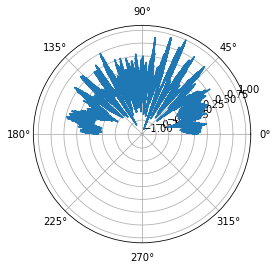

In [5]:
hyd_xcorr.plot_polar_TDOA(xcorr_stack, t)